In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_columns import childhood, demographic, diagnosis, all
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

import warnings

/Users/samroska/github/milestone-2-siads-696/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
init_df = pd.read_csv('./data/filtered_mental_health_data.csv')
init_df.shape

(5001, 594)

In [4]:
df = init_df.copy()
# df_filtered = df[df.columns[~df.columns.str.match(r'^(D_|DSM_)')]]
df_filtered = df.copy()

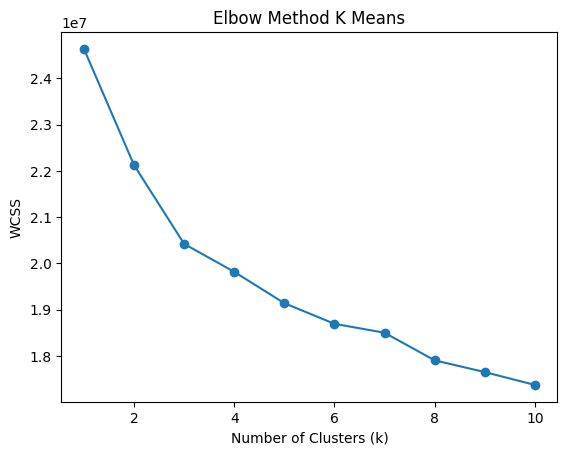

In [5]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_filtered)
    wcss.append(kmeans.inertia_) # Within-Cluster Sum of Squares

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method K Means')
plt.show()

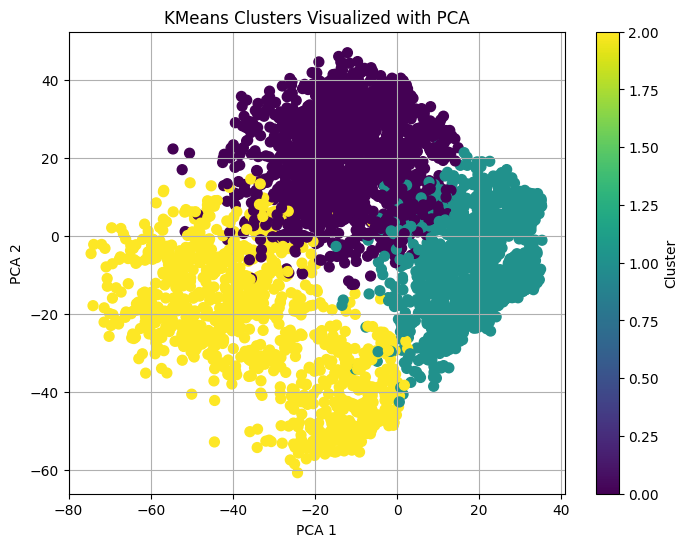

Silhouette Coefficient: 0.167
Davis - Bouldin score: 1.9906695733986657


In [6]:
kmeans_df = df_filtered.copy()
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_df['cluster'] = kmeans.fit_predict(kmeans_df)

pca = PCA(n_components=2)
components = pca.fit_transform(kmeans_df.drop('cluster', axis=1))
kmeans_df['pca1'] = components[:, 0]
kmeans_df['pca2'] = components[:, 1]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(kmeans_df['pca1'], kmeans_df['pca2'], c=kmeans_df['cluster'], cmap='viridis', s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clusters Visualized with PCA")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

sil_coeff = silhouette_score(kmeans_df.drop('cluster', axis=1), kmeans_df["cluster"])
print("Silhouette Coefficient:", round(sil_coeff, 3))

score = davies_bouldin_score(kmeans_df.drop('cluster', axis=1), kmeans_df["cluster"])
print("Davis - Bouldin score:",score)


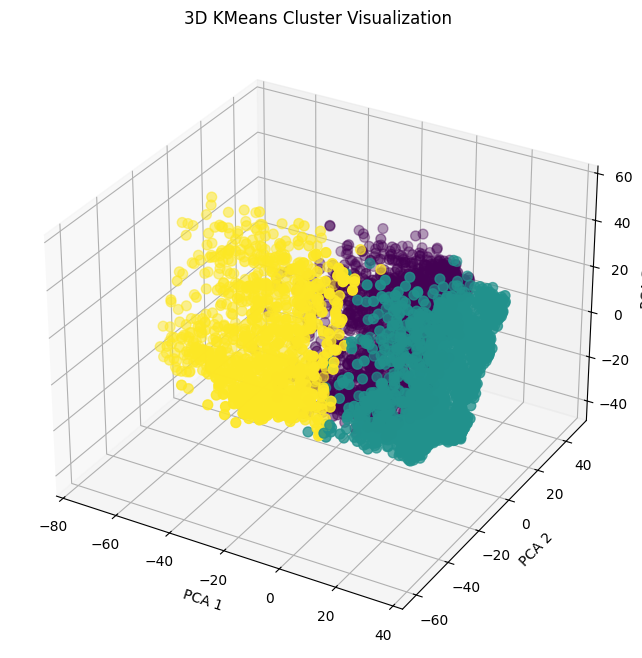

Silhouette Coefficient: 0.164
Davis - Bouldin score: 2.014869014089697


In [7]:
kmeans_df2 = df_filtered.copy()
kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans_df2['cluster'] = kmeans2.fit_predict(kmeans_df2)

pca2 = PCA(n_components=3)
components = pca2.fit_transform(kmeans_df2.drop('cluster', axis=1))
kmeans_df2['pca1'] = components[:, 0]
kmeans_df2['pca2'] = components[:, 1]
kmeans_df2['pca3'] = components[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kmeans_df2['pca1'], kmeans_df2['pca2'], kmeans_df2['pca3'],c=kmeans_df2['cluster'], cmap='viridis', s=50)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D KMeans Cluster Visualization")
plt.show()

sil_coeff = silhouette_score(kmeans_df2.drop('cluster', axis=1), kmeans_df2["cluster"])
print("Silhouette Coefficient:", round(sil_coeff, 3))
score = davies_bouldin_score(kmeans_df2.drop('cluster', axis=1), kmeans_df2["cluster"])
print("Davis - Bouldin score:",score)

/Users/samroska/github/milestone-2-siads-696/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/samroska/github/milestone-2-siads-696/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


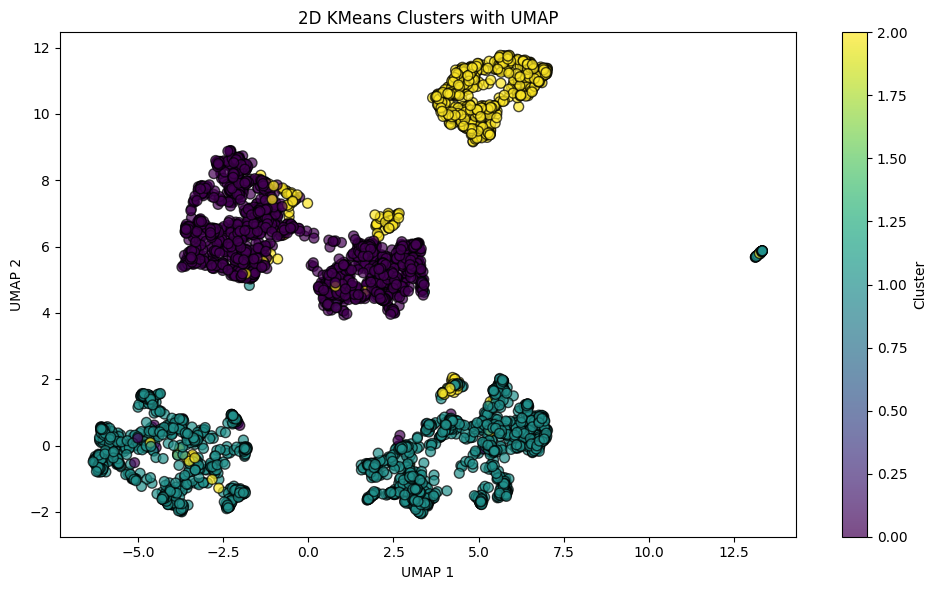

Silhouette Coefficient: 0.107
Davis - Bouldin score: 2.63377118163037


In [8]:
kmeans_df4 = df_filtered.copy()
kmeans4 = KMeans(n_clusters=3, random_state=42)
kmeans_df4['cluster'] = kmeans4.fit_predict(kmeans_df4)

# Create a 2D UMAP embedding
reducer = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(kmeans_df4.drop('cluster', axis=1))

# Add UMAP components to DataFrame
kmeans_df4['umap1'] = embedding_2d[:, 0]
kmeans_df4['umap2'] = embedding_2d[:, 1]

# Plot in 2D
plt.figure(figsize=(10, 6))
plt.scatter(kmeans_df4['umap1'], kmeans_df4['umap2'], c=kmeans_df4['cluster'],cmap='viridis', s=50, alpha=0.7, edgecolor='k')
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("2D KMeans Clusters with UMAP")
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

sil_coeff = silhouette_score(kmeans_df4.drop('cluster', axis=1), kmeans_df4["cluster"])
print("Silhouette Coefficient:", round(sil_coeff, 3))
score = davies_bouldin_score(kmeans_df4.drop('cluster', axis=1), kmeans_df4["cluster"])
print("Davis - Bouldin score:",score)

/Users/samroska/github/milestone-2-siads-696/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/samroska/github/milestone-2-siads-696/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


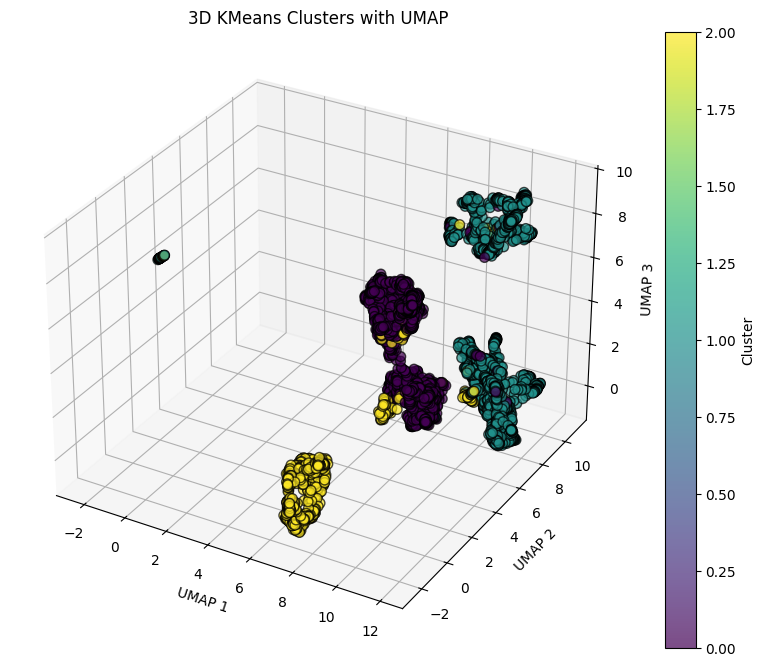

In [9]:
kmeans_df3 = df_filtered.copy()
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans_df3['cluster'] = kmeans3.fit_predict(kmeans_df3)

reducer = umap.UMAP(n_components=3, random_state=42)
embedding = reducer.fit_transform(kmeans_df3.drop('cluster', axis=1))
kmeans_df3['umap1'] = embedding[:, 0]
kmeans_df3['umap2'] = embedding[:, 1]
kmeans_df3['umap3'] = embedding[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kmeans_df3['umap1'], kmeans_df3['umap2'], kmeans_df3['umap3'], c=kmeans_df3['cluster'], cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")
ax.set_title("3D KMeans Clusters with UMAP")
fig.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

/Users/samroska/github/milestone-2-siads-696/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/samroska/github/milestone-2-siads-696/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


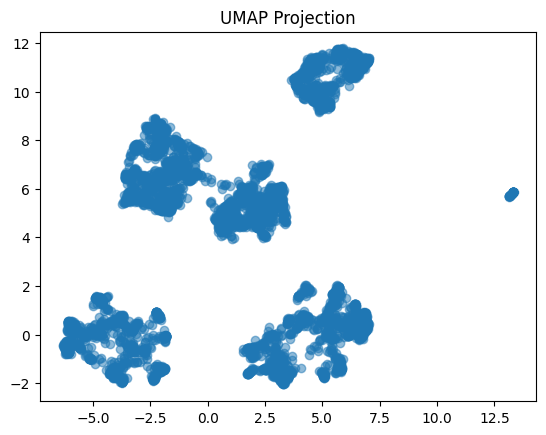

In [10]:
umap_model = umap.UMAP(random_state=42)
X_umap = umap_model.fit_transform(df_filtered)

plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.5)
plt.title("UMAP Projection")
plt.show()

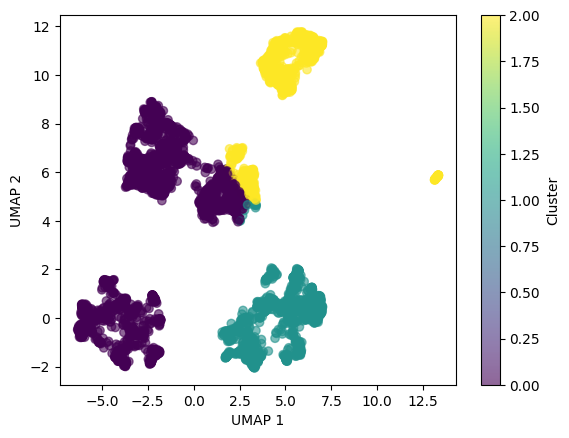

Silhouette Coefficient: 0.491
Davis - Bouldin score: 0.7271025348223591


In [11]:
kmeans1 = KMeans(n_clusters=3, random_state=42)
labels1 = kmeans1.fit_predict(X_umap)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels1, cmap='viridis', alpha=0.6)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="Cluster")
plt.show()

sil_coeff = silhouette_score(X_umap,labels1)
print("Silhouette Coefficient:", round(sil_coeff, 3))

score = davies_bouldin_score(X_umap, labels1)
print("Davis - Bouldin score:",score)

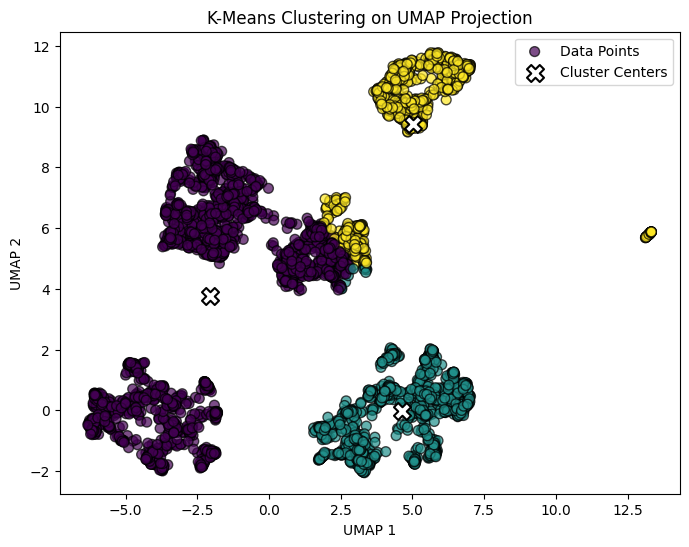

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels1, label='Data Points', cmap='viridis', s=50, alpha=0.7, edgecolor='k')

plt.scatter(
    kmeans1.cluster_centers_[:, 0],
    kmeans1.cluster_centers_[:, 1],
    c='white',
    s=150,
    marker='X',
    edgecolor='black',
    linewidth=1.5,
    label='Cluster Centers'
)

plt.title("K-Means Clustering on UMAP Projection")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend()
plt.show()